In [5]:
# Initialize Otter
import otter
grader = otter.Notebook("hw2.ipynb")



# Decision trees and machine learning fundamentals 

Imports
------

In [6]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

<br><br>

## Instructions

1. Go to the command line/terminal.
2. Activate the course conda environment and install otter-grader using the following commands.

    ```
    conda activate cpsc330
    pip install otter-grader
    ```

The cell at the top of the notebook will throw an error if you do not install `otter-grader`. 

<br><br>

## Introducing the data set
 
For the rest of the lab you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset. The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/get-several-audio-features). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it under the `data` directory. 


<br><br>

## Exercise 1: Exploratory data analysis

### 1.1 Loading the data

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column (index=0) of the .csv file should be set as the index.

<div class="alert alert-warning">

Solution_1.1
    
</div>


In [7]:
spotify_df = pd.read_csv('data/spotify.csv')
spotify_df = spotify_df.drop(spotify_df.columns[0], axis = 1)

In [8]:
grader.check("q1.1")

q1.1 results: All test cases passed!

<br><br>

### 1.2 Number of training and test examples


In [9]:
train_df, test_df = train_test_split(spotify_df, test_size=0.2, random_state=321)

<div class="alert alert-warning">

Solution_1.2
    

In [10]:
# Please provide numeric values
n_train_samples = train_df.shape[0]
n_test_samples = test_df.shape[0]


In [11]:
print(n_train_samples)

1613


In [12]:
print(n_test_samples)

404


In [13]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<br><br>

#### 1.3


1. Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
2. Which feature has the smallest range? 



<div class="alert alert-warning">

Solution_1.3


In [14]:
spotify_summary = train_df.describe()
print(spotify_summary)

       acousticness  danceability   duration_ms       energy  \
count   1613.000000   1613.000000  1.613000e+03  1613.000000   
mean       0.185067      0.620076  2.462533e+05     0.681315   
std        0.255838      0.161152  8.056740e+04     0.206964   
min        0.000003      0.148000  1.604200e+04     0.015600   
25%        0.010000      0.514000  1.999040e+05     0.564000   
50%        0.062600      0.634000  2.298590e+05     0.712000   
75%        0.260000      0.739000  2.703330e+05     0.841000   
max        0.994000      0.984000  1.004627e+06     0.997000   

       instrumentalness          key     liveness     loudness         mode  \
count       1613.000000  1613.000000  1613.000000  1613.000000  1613.000000   
mean           0.134317     5.384377     0.191317    -7.095272     0.619343   
std            0.274217     3.653722     0.156071     3.678993     0.485699   
min            0.000000     0.000000     0.018800   -31.082000     0.000000   
25%            0.000000     

In [15]:
smallest_range_feature = (spotify_summary.loc['max'] - spotify_summary.loc['min']).idxmin()

In [16]:
grader.check("q1.3")

q1.3 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 Plotting histograms 


The starter code below produces histograms for the `loudness` feature which shows the distribution of the feature values in the training set, separated for positive (target=1, i.e., user liked the song) and negative (target=0, i.e., user disliked the song) examples. There are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).


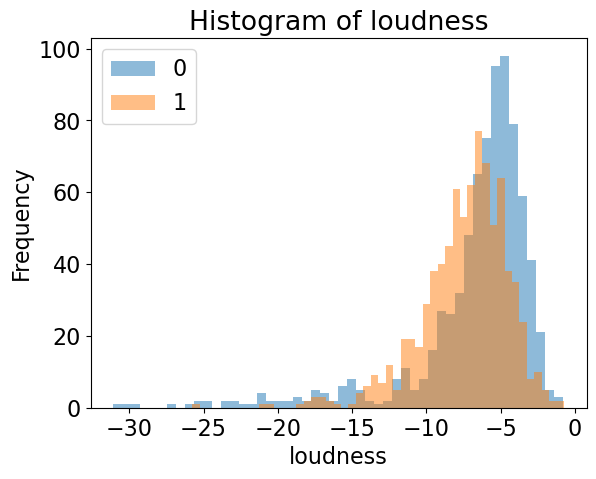

In [17]:
feat = "loudness"
ax = train_df.groupby("target")[feat].plot.hist(bins=50, alpha=0.5, legend=True)
plt.xlabel(feat)
plt.title("Histogram of " + feat)
plt.show()



Create histograms for the following features in the order below.
- acousticness
- danceability
- tempo
- energy
- valence



<div class="alert alert-warning">

Solution_1.4
    


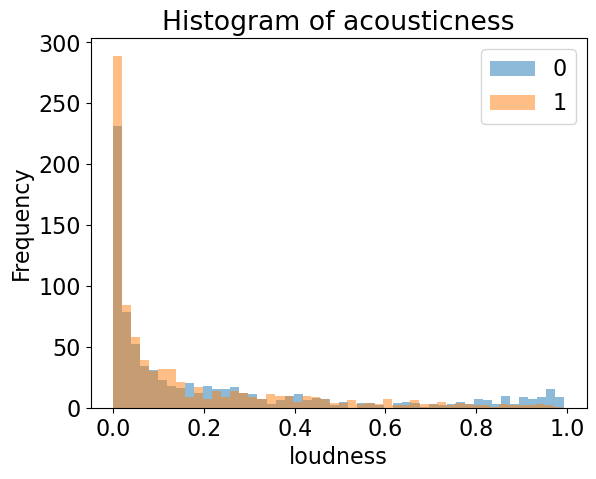

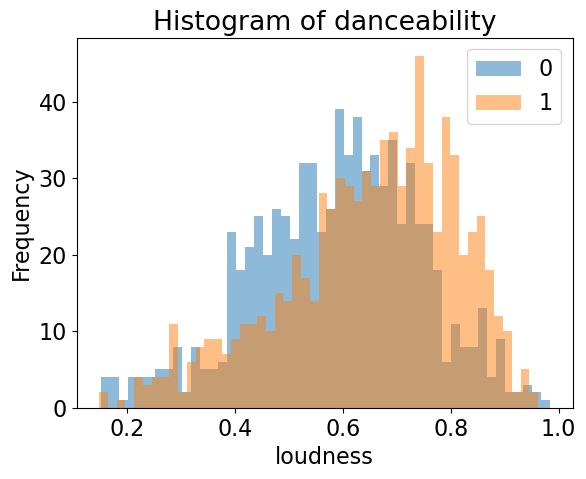

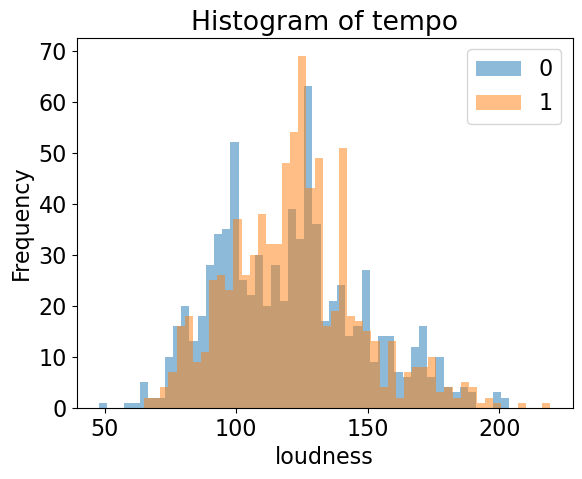

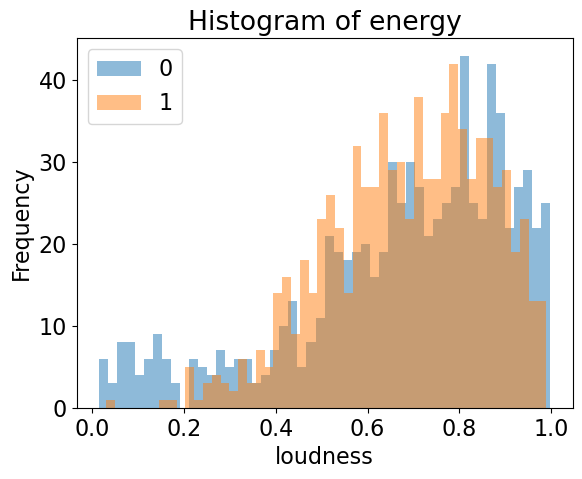

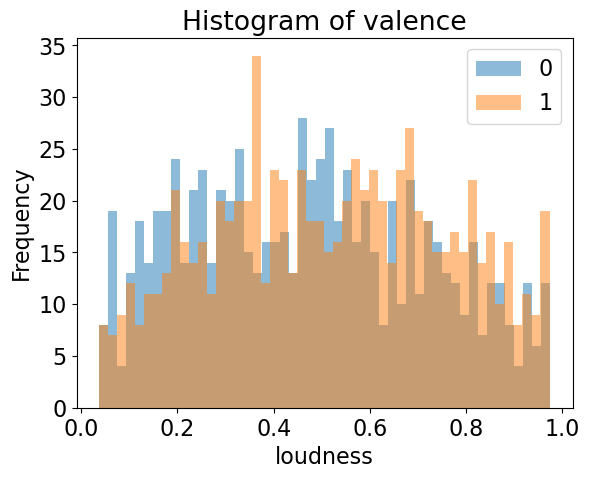

In [18]:
featureArray = ["acousticness", "danceability", "tempo", "energy", "valence"]
for i in range(0, 5): 
    ax = train_df.groupby("target")[featureArray[i]].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + featureArray[i])
    plt.show()
    

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Identical histograms


Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?

<div class="alert alert-warning">

Solution_1.5
    

Yes, I would say so. It follows that if we can see that a feature has no aggregated difference between two target classes, then we should be able to ignore that feature in our modeling. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Which columns to include? 

Note that the dataset includes two free text features labeled `song_title` and `artist`. Do you think these features could be useful in predicting whether the user liked the song or not? Would there be any difficulty in using them in your model?   

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

Yes. In regard to an artist, this could be a means of measuring whether popularity ultimately determines whether a song is liked or not. Similarly, there may be some sort of cognitive bias to the enjoyment of a song based on its title. These two features are particularly hard to work with as they are not generally categorical nor quantitative, and so some preprocessing of sorts may need to be in place for them. 

<!-- END QUESTION -->

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

<hr>
Recall that in machine learning what we care about is generalization; we want to build models that generalize well on unseen examples. One way to approximate generalization error is by splitting the data into train and test splits, building and tuning the model only using the train split, and carrying out the final assessment on the test split. 

<br><br>

### 2.1

1. Separate `X` and `y` from `train_df` and `test_df` and store them as `X_train`, `y_train`, `X_test`, `y_test`, respectively. Skip the `song_title` and `artist` columns for now. 

<div class="alert alert-warning">

Solution_2.1
    


In [19]:
X_train = train_df.drop(columns=["target","song_title","artist"])
y_train = train_df['target']
X_test = test_df.drop(columns = ["target","song_title","artist"])
y_test = test_df['target']

In [20]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<br><br>

### 2.2



1. Create a `DecisionTreeClassifier` with `random_state=123` and store it in a variable called `spotify_tree`.
2. Fit the the decision tree classifier. 

<div class="alert alert-warning">

Solution_2.2
    


In [21]:
spotify_tree = DecisionTreeClassifier(random_state=123)
spotify_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [22]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br>

### 2.3 
rubric={autograde}


1. Use the `predict` method to predict the class of the first example in your `X_train` and store the prediction in a variable called `pred` and compare it with the "true" class from `y_train`.   


<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 2

In [23]:
pred = spotify_tree.predict(X_train.iloc[[0]])[0]

In [24]:
grader.check("q2.3")

q2.3 results: All test cases passed!

<br><br>

### 2.4

1. Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. Store the mean cross-validation accuracy in a variable called `mean_cv_score`.  


<div class="alert alert-warning">

Solution_2.4


In [25]:
mean_cv_score = np.mean(cross_val_score(spotify_tree, X_train, y_train, cv = 10))
mean_cv_score

0.6820105820105821

In [26]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<br><br>

### 2.5


The above is useful, but we would like to see the training accuracy as well. 



1. Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True` and save the results in a variable called `scores_df` as a pandas dataframe.  

<div class="alert alert-warning">

Solution_2.5
    


In [27]:
scores_df = pd.DataFrame(cross_validate(spotify_tree, X_train, y_train, cv = 10, return_train_score = True))
scores_df

,fit_time,score_time,test_score,train_score
0,0.023999,0.007995,0.685185,0.999311
1,0.024097,0.000000,0.635802,0.998622
2,0.015949,0.000000,0.641975,0.999311
3,0.017320,0.000000,0.708075,0.998623
4,0.016007,0.000000,0.726708,0.998623
5,0.015994,0.008105,0.608696,0.998623
6,0.015947,0.007958,0.714286,0.998623
7,0.015998,0.000000,0.714286,0.999311
8,0.016011,0.000000,0.677019,0.999311
9,0.015994,0.000000,0.708075,0.998623


In [28]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.6

1. Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your mean cross-validation score?
2. Do you see a significant difference between the training scores and the cross-validation scores? Briefly discuss in 1 to 2 sentences.

<div class="alert alert-warning">

Solution_2.6


1. We see through the 10 sub-scores found that the average is reasonable among that of the found data. Thus, we can trust the mean cross-validation score. 

2. Yes, there is a significant difference between the training scores and the cross-validation scores. This is to be expected, since the model was not trained on the validation data. Thus, must have a lower score. 

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Hyperparameters 

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

### 3.1





1. Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25). 
2. For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
3. Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which. Store the plot in a variable called `max_depth_plot` for autograding. 



In [76]:
#Adapted from lecture 3
depths = np.arange(1, 25, 2)
results_dic = {
    "depth": [],
    "train_scores":[],
    "test_scores":[]
}
for i in depths:
    current_model = DecisionTreeClassifier(max_depth = i)
    scores = cross_validate(current_model, X_train, y_train, cv = 10, return_train_score=True)
    averaged_scores_df = pd.DataFrame(pd.DataFrame(scores).mean())
    results_dic['depth'].append(i)
    results_dic['train_scores'].append(averaged_scores_df.loc['train_score'][0])
    results_dic['test_scores'].append(averaged_scores_df.loc['test_score'][0])

results_df = pd.DataFrame(results_dic)
results_df = results_df.set_index("depth")

<div class="alert alert-warning">

Solution_3.1
    


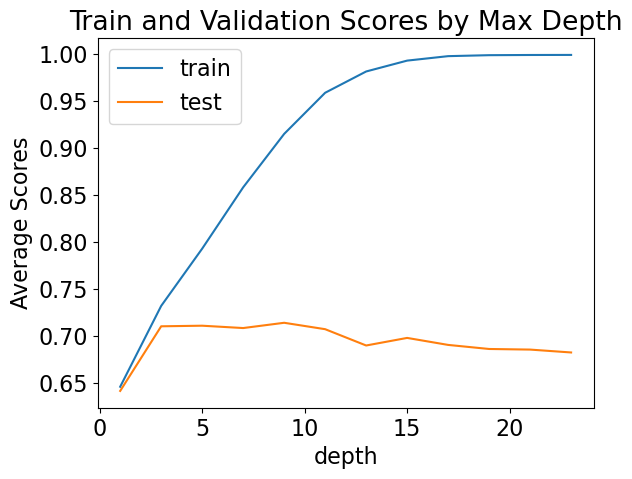

In [77]:
# max_depth_plot: the figure plotted for this exercise
#Adapted from lecture 3
max_depth_plot = results_df[["train_scores", "test_scores"]].plot()
max_depth_plot.set_title("Train and Validation Scores by Max Depth")
max_depth_plot.set_ylabel("Average Scores")
max_depth_plot.legend(["train", "test"])

In [78]:
max_depth_plot.legend().get_texts()[0].get_text()

'train_scores'

In [79]:
grader.check("q3.1")

q3.1 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 `max_depth` and the fundamental tradeoff

Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy.

<div class="alert alert-warning">

Solution_3.2
    


For the training accuracy, it is expected that the accuracy tends to 1, since increasing the depth increases the complexity of the model to the training data. However, the test data hits an asymptote a such represents the accuracy of the model. And does not clearly increase or decrease as the max depth increases. 

<!-- END QUESTION -->

<br><br>

### 3.3 Picking a reasonable value for `max_depth`


From these results, what value for max_depth would you pick as the optimal value? Store it in the variable called `best_max_depth` below. 

<div class="alert alert-warning">

Solution_3.3
    


In [80]:
best_max_depth = results_df['test_scores'].idxmax()

In [81]:
grader.check("q3.3")

q3.3 results: All test cases passed!

<br><br>

### 3.4 Final assessment on the test set


Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 


1. Train a decision tree classifier using the optimal _max_depth_ you chose in the previous exercise on the entire training set.
2. Compute and store it in a variable called `test_score`. 

<div class="alert alert-warning">

Solution_3.4
    


In [84]:
test_score = DecisionTreeClassifier(max_depth=best_max_depth).fit(X_train, y_train).score(X_test, y_test)
test_score

0.6683168316831684

In [83]:
grader.check("q3.4")

q3.4 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.5 Analysis


1. How do the test scores compare to the cross-validation scores? Briefly discuss.
2. Why can't you simply pick the value of `max_depth` that gives the best accuracy on the training data? (Answer in maximum 2 to 3 sentences.)
3. Do you think that the max_depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

<div class="alert alert-warning">

Solution_3.5
    


1. The test scores are generally smaller than the cross-validation scores. This is to be expected, as it is our final test without the fine tuning from validation data or the model from training data.

2. The training data is not a fair assessment to the accuracy of the model. As the model is being trained on that data, it is expected to have a high accuracy. So picking the max_depth to the highest accuracy for the training data may not necessarily be the best max_depth for the test_data. Which is the purpose of the validation data, to generalize these parameters beyond the training data. 

3. No. I would say we'd have to creating validation sets on larger datasets, or specific subsets for other users before we can make the assessment that the max_depth is generailzable for other spotify users. 

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

## Exercise 4: Conceptual questions


Consider the dataset below, which has $6$ examples and $2$ features:

$$X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

<div class="alert alert-warning">

Solution_4
    


1. The true case includes 5,4,2. While the false case includes 10,9,9. 

2. The right side of the stump (larger than or equal to 5.5) would have accuracy of 100%, while the left side of the stump (less than 5.5) 66%. 

3. No because we do not have fully pure leafs, we would need to extend the depth further. 

<!-- END QUESTION -->

<br><br><br><br>